# Import packages

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.optimize as opt
import pandas as pd
plt.style.use('ggplot')

# Printing

In [17]:
h1 = np.random.normal()
h2 = np.random.normal()
#print it rounded to two decimal places
print("the answer is h1={:.2f} h2={:.2f}".format(h1,h2))
# add a line break in
print("the answer to question 1 is h1={:.2f} \nthe answer to question 2 is h2={:.2f}".format(h1,h2))

the answer is h1=0.04 h2=0.68
the answer to question 1 is h1=0.04 
the answer to question 2 is h2=0.68


# Plotting with matplotlib

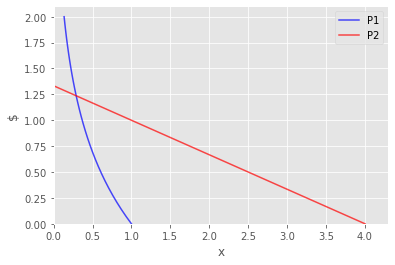

In [47]:
ps = np.linspace(0,2,30) #prices
xs1 = np.exp(-ps) #resulting demand from x(p)=e^-p
xs2 = 4-3*ps #resulting demand from x(p)=4-3*p

#plot inverse demand functions

plt.plot(xs1,ps,color='blue',label='P1',alpha=0.7)
plt.plot(xs2,ps,color='red',label='P2',alpha=0.7)
plt.xlim(0,plt.xlim()[1])
plt.ylim(0,plt.ylim()[1])
plt.xlabel('x')
plt.ylabel('$')
plt.legend() #create a legend

# Pandas basics

In [33]:
#make a DataFrame
N = 50
df = pd.DataFrame({'A': np.random.normal(0,1,N),'B':np.random.beta(1,1,N), 'x': np.linspace(0,5,N)})
df.head()

# add a column
df['C'] = np.random.normal(.5,1,N)

#drop a column
df = df.drop('B',axis=1)

#filter the rows where A is positive
df = df[df.A>=0]
df.head()

,A,x,C
0,2.009797,0.000000,-1.078295
1,1.834394,0.102041,2.469968
2,0.441356,0.204082,0.092812
3,0.094743,0.306122,-0.307717
5,0.806045,0.510204,3.425348


## Scatter plot from pandas dataframe

Text(0, 0.5, 'draw')

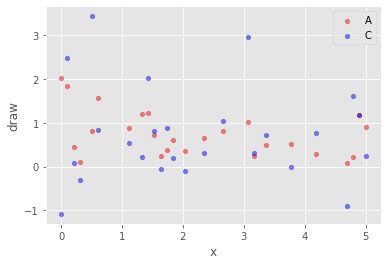

In [69]:
# plot as scatter
ax = df.plot('x','A',kind='scatter',color='red',alpha=0.5,label='A') #make sure to declare a label
df.plot('x','C',kind='scatter', ax=ax,color='blue',alpha=0.5,label='C')
ax.legend() #show a legend
ax.set_xlabel("x") #set the xlabel
ax.set_ylabel("draw") #set the y label

In [52]:
# iterate an operation over rows
#this is too simple to do in this way really but you get the gist
df[['result1','result2']] = df.apply(lambda row: [row.A*2,row.C/2], result_type='expand',axis=1) 
df.head()

,A,x,C,result1,result2
0,2.009797,0.000000,-1.078295,4.019594,-0.539148
1,1.834394,0.102041,2.469968,3.668789,1.234984
2,0.441356,0.204082,0.092812,0.882712,0.046406
3,0.094743,0.306122,-0.307717,0.189486,-0.153859
5,0.806045,0.510204,3.425348,1.612091,1.712674


# Unconstrained Maximization

You have a demand function 
$$X(p) = 10 - 2p,$$
where \(p\) is price. And total cost function
$$TC(x) = 2 + 1.5x.$$

You want to maximize profit.

So the profit-maximizing quantity is 3.50
and the profit-maximizing price is 3.25


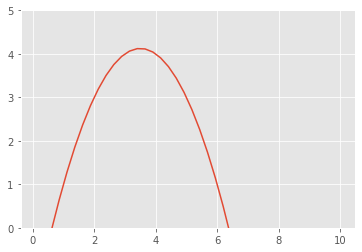

In [8]:
#start out by creating the functions
X = lambda p: 10 - 2*p #demand
P = lambda x: .5*(10-x) #inverse demand, with x as demand
TC = lambda x: 2+1.5*x #total cost
TR = lambda x: x*P(x) #total revenue
π = lambda x: TR(x) - TC(x) #profit

# now plot
xs = np.linspace(.1,10,40)
πs = π(xs)
plt.plot(xs,πs)
plt.ylim(0,5)

#now calculcate where the profit is maximized by minimumizing the *negative* of profit
res =opt.minimize_scalar(lambda x: -π(x), bounds=(2, 6), method='bounded')
print("So the profit-maximizing quantity is {:.2f}".format(res.x))
print("and the profit-maximizing price is {:.2f}".format(P(res.x)))

# Constrained Maximization

In this problem, we have an inverse demand function, and we want to maximize revenue subject to the condition that profit $\pi$ is at least $\pi_{\min}$.

In [9]:
π_min = 0.3
P = lambda x: 3 - 2.5*x
TR = lambda x: P(x)*x
c = .2 #marginal cost/variable cost per ride
C = lambda x: c*x
π = lambda x: TR(x) - C(x)


def fun(x):
    x = x[0]
    return np.array([
        π(x)- π_min
    ])

constraints = {'type': 'ineq', 'fun': fun}
res = opt.minimize(lambda x: -TR(x[0]), x0=(1.0), constraints=constraints, bounds=((0,None),))
xstar = res.x[0]
print("The optimal values are x={:.2f}, P={:.2f}, π={:.2f}, TR={:.2f}".format(xstar,P(xstar),π(xstar),TR(xstar)))

The optimal values are x=0.60, P=1.50, π=0.78, TR=0.90


# Logit

In [12]:
data = pd.read_csv("logit_truck_rail.csv",index_col="route_index") #i use the index_col keyword argument to tell pandas  to use the route_index as an index
# exogenous data for logit
exog = data.drop('P_actual',axis=1) # i can use .drop to drop the P_actual from it. check documentation https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html 
# or i could do exog = data[['c_rail,t_rail,c_truck,t_truck']]
exog = sm.add_constant(exog) # add the one column
res = sm.Logit(data.P_actual,exog).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.387862
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               P_actual   No. Observations:                 2000
Model:                          Logit   Df Residuals:                     1995
Method:                           MLE   Df Model:                            4
Date:                Mon, 08 Mar 2021   Pseudo R-squ.:                  0.3688
Time:                        07:05:52   Log-Likelihood:                -775.72
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                6.321e-195
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5023      0.520     -0.967      0.334      -1.521       0.516
t_rail        -2.9606      0.188    -15.767      0.000      -3.329      -2.593
t_truck        2.9542      0.203     14.523      0.000       2.556       3.353
c_rail        -1.4419      0.232     -6.206      0.000      -1.897      -0.987
c_truck        1.4622      0.117     12.454      0.000       1.232       1.692
==============================================================================
"""

In [13]:
#res.params tells you the coefficients
res.params

const     -0.502313
t_rail    -2.960566
t_truck    2.954245
c_rail    -1.441923
c_truck    1.462242
dtype: float64

# Root finding

Suppose you want to solve the equation $$x e^x = 2x + 1.$$

Rewrite it as $$x e^x - 2x - 1=0$$ and seek the root.

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.075063144774534
the root is 1.08


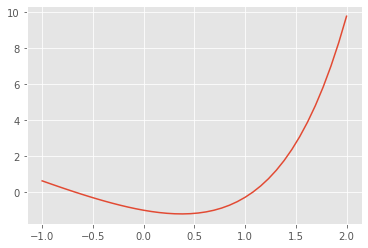

In [67]:
f = lambda x: x*np.exp(x) - 2*x - 1

#plot it to get an idea
xs = np.linspace(-1,2,40)
fs = f(xs)
plt.plot(xs,fs)

#from the plot we can see that there is a root around 1. i want to see that one.

res = opt.root_scalar(f,bracket=[.1,1.5]) #the two points of the bracket must give f(x) on opposite sides of zero (one positive, one negative)
print(res)
print("the root is {:.2f}".format(res.root))